<a href="https://colab.research.google.com/github/ASUcicilab/GIS322/blob/main/notebook/Module_3_(1)_Geometry_Collection_in_Shapely.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## GeometryCollection in Shapely

Heterogeneous collections of geometric objects may result from some Shapely operations. For example, two LineStrings may intersect along a line and at a point. To represent these kind of results, Shapely provides immutable collections of geometric objects. The collections may be homogeneous (MultiPoint etc.) or heterogeneous. Below we will look at several data structure:

1. MultiPoint: Collection of Points

2. MultiLineString: Collection of Lines

3. MultiPolygon: Collection of Polygons

### MultiPoint

**1. Create a MultiPoint object**

In [1]:
from shapely.geometry import MultiPoint

points = MultiPoint([(0.0, 0.0), (1.0, 1.0)])

print(points.area) # since a point does not have an area or length, calling these two attributes will return 0.0

print(points.length)

# Get the bounds of the point

print("Bounds of the points are: ", points.bounds)


0.0
0.0
Bounds of the points are:  (0.0, 0.0, 1.0, 1.0)


**2. Get access to the coordinates.**

Members of a multi-point collection are accessed via the geoms property or via the iterator protocol using in or list().


In [2]:
pts = list(points.geoms)

for pt in pts:
  print(pt.x, pt.y)

0.0 0.0
1.0 1.0



**3. Another way of creating a MultiPoint object.**

The constructor also accepts another MultiPoint instance or an unordered sequence of Point instances, thereby making copies.

In [3]:
from shapely.geometry import Point

mpts = MultiPoint([Point(0, 0), Point(1, 1)])

for pt in list(mpts.geoms):
  print(pt.x, pt.y)

0.0 0.0
1.0 1.0


### MultiLineString

Two ways of creating a MultiLineString object

1. Each line is represented as a tuple of points

2. Each line is defined as a LineString object

A MultiLineString has zero area and non-zero length.


**1. Create a MultiLineString object**

In [4]:
from shapely.geometry import MultiLineString

coords = [((0, 0), (1, 1)), ((-1, 0), (1, 0))]

lines = MultiLineString(coords)

print("line area: ", lines.area)

print("line length: ", lines.length)

print("line bounds: ", lines.bounds) # returned bounds are set in a tuple


line area:  0.0
line length:  3.414213562373095
line bounds:  (-1.0, 0.0, 1.0, 1.0)


**2. Get access to the coordinates**

Its members are instances of LineString and are accessed via the geoms property or via the iterator protocol using in or list().


In [5]:
linesCoords = list(lines.geoms)

for line in linesCoords:
  print("line:")
  for pt in line.coords: # get access to the coordinates of each line
    print(pt[0], pt[1])

line:
0.0 0.0
1.0 1.0
line:
-1.0 0.0
1.0 0.0



**3. Create MultiLineString object from a list of LineString objects**

The constructor also accepts another instance of MultiLineString or an unordered sequence of LineString instances, thereby making copies.


In [6]:
from shapely.geometry import LineString
line1 = LineString([(0,0),(1,1)])
line2 = LineString([(-1,0),(1,0)])

lines = MultiLineString([line1, line2])

#Get access to the coordinate values
linesCoords = list(lines.geoms)

for line in linesCoords:
  print("line:")
  for pt in line.coords: # get access to the coordinates of each line
    print(pt[0], pt[1])

line:
0.0 0.0
1.0 1.0
line:
-1.0 0.0
1.0 0.0


### MultiPolygon

The constructor also accepts an unordered sequence of Polygon instances, thereby making copies.

**1. Create a MultiPolygon object**

In [7]:
from shapely.geometry import Polygon
from shapely.geometry import MultiPolygon

polygon1 = Polygon([(0, 0), (1, 1), (1, 0)])
polygon2 = Polygon([(2, 2), (3, 3), (3, 0)])
polygon3 = Polygon([(5, 5), (6, 6), (6, 0)])

polygons = MultiPolygon([polygon1, polygon2, polygon3])

#Get access to the coordinate values
polygonsCoords = list(polygons.geoms)

for polygon in polygonsCoords:
  print("polygon:")
  for pt in polygon.exterior.coords: # get access to the coordinates of each polygon
    print(pt[0], pt[1])

polygon:
0.0 0.0
1.0 1.0
1.0 0.0
0.0 0.0
polygon:
2.0 2.0
3.0 3.0
3.0 0.0
2.0 2.0
polygon:
5.0 5.0
6.0 6.0
6.0 0.0
5.0 5.0


**2. Visualize the above MultiPolygon object using matplotlib**

Matplotlib is building the font cache; this may take a moment.


POLYGON ((0 0, 1 1, 1 0, 0 0))
POLYGON ((2 2, 3 3, 3 0, 2 2))
POLYGON ((5 5, 6 6, 6 0, 5 5))


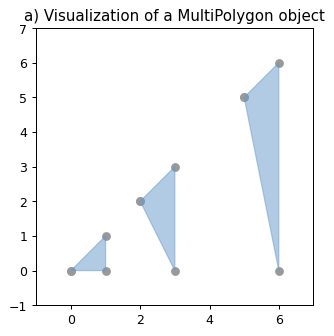

In [8]:
from matplotlib import pyplot
from shapely.geometry import MultiPolygon

COLOR = {
    True:  '#6699cc',
    False: '#ff3333'
    }

def v_color(ob):
    return COLOR[ob.is_valid]

def plot_coords(ax, ob):
    x, y = ob.xy
    ax.plot(x, y, 'o', color='#999999', zorder=1)

fig = pyplot.figure(1, figsize=(10,4), dpi=90)

# 1: valid multi-polygon
ax = fig.add_subplot(121)

for polygon in polygonsCoords:
    print(polygon)
    xs, ys = polygon.exterior.xy
    plot_coords(ax, polygon.exterior)
    ax.fill(xs, ys, alpha=0.5, facecolor=v_color(polygons), edgecolor=v_color(polygons))

ax.set_title('a) Visualization of a MultiPolygon object')

xrange = [-1, 7]
yrange = [-1, 7]
ax.set_xlim(*xrange)
#ax.set_xticks(range(*xrange) + [xrange[-1]])
ax.set_ylim(*yrange)
#ax.set_yticks(range(*yrange) + [yrange[-1]])
ax.set_aspect(1)


pyplot.show()



**3. Check the validity of a MultiPolygon object**

A valid LinearRing may not cross itself or touch itself at a single point. A valid Polygon may not possess any overlapping exterior or interior rings. A valid MultiPolygon may not collect any overlapping polygons. Operations on invalid features may fail.


In [9]:
mpoly = MultiPolygon([Point(0, 0).buffer(2.0), Point(1, 1).buffer(2.0)])

print(mpoly.is_valid)

False


**4. Check other properties of a MultiPolygon object**

1. is_ring: Returns True if the feature is closed. A closed feature’s boundary coincides with the empty set. This property is applicable to LineString and LinearRing instances, but meaningless for others.

2. is_simple: Returns True if the feature does not cross itself.

3. is_empty: Returns True if the feature’s interior and boundary (in point set terms) coincide with the empty set.

4. has_z: Returns True if the feature has not only x and y, but also z coordinates for 3D (or so-called, 2.5D) geometries.



In [10]:
print("Is a ring? ", mpoly.is_ring)

print("Is a simple polygon (not cross itself)? ", mpoly.is_simple)

print("Is empty? ", mpoly.is_empty)

print("has z dimension? ", mpoly.has_z)


Is a ring?  False
Is a simple polygon (not cross itself)?  True
Is empty?  False
has z dimension?  False
